In [21]:
import pandas as pd
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1')

In [3]:
session = fastf1.get_session(2021, 'Monaco', 'Q')

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\ezzel\AppData\Local\Temp\fastf1


In [4]:
session.load(telemetry=False, laps=False, weather=True)

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. Loading data...
_api           INFO 	Fetching race control messages...
req            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['16', '33', '77', '55', '4', '10', '44', '5', '11', '99', '31', '3', '18', '7', '63', '22', '14', '6', '9', '47']


In [12]:
leclerc = session.get_driver('LEC')
hamilton = session.get_driver('HAM')
verstappen = session.get_driver('VER')

In [13]:
print(f"Charles {leclerc['LastName']}")
print(f"Lewis {hamilton['LastName']}")
print(f"Max {verstappen['LastName']}")

Charles Leclerc
Lewis Hamilton
Max Verstappen


In [18]:
race = fastf1.get_session(2021, 'Austria', 'R')
race.load()

events      WARNING 	Correcting user input 'Austria' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...


In [25]:
import fastf1.plotting


driver_df = []

for driver in ('HAM', "LEC", "VER", "PER", "RUS"):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    driver_info = plotting.get_driver_style(identifier=driver, style=['color', 'linestyle'], session=race)
    laps['Driver'] = driver
    laps['Color'] = driver_info['color']
    driver_df.append(laps)

combined_df = pd.concat(driver_df)


fig = px.line(combined_df, x='LapNumber',
              y='LapTime', color='Driver', color_discrete_map={
                  'HAM':combined_df[combined_df['Driver']=="HAM"]['Color'].iloc[0],
                  'LEC':combined_df[combined_df['Driver']=="LEC"]['Color'].iloc[0],
                  'VER':combined_df[combined_df['Driver']=="VER"]['Color'].iloc[0],
                  'PER':combined_df[combined_df['Driver']=="PER"]['Color'].iloc[0],
                  'RUS':combined_df[combined_df['Driver']=="RUS"]['Color'].iloc[0],
              },labels={"LapNumber": "Lap Number", "LapTime":"Lap Time (s)"},
              title='Lap Times Throughout the race')
fig

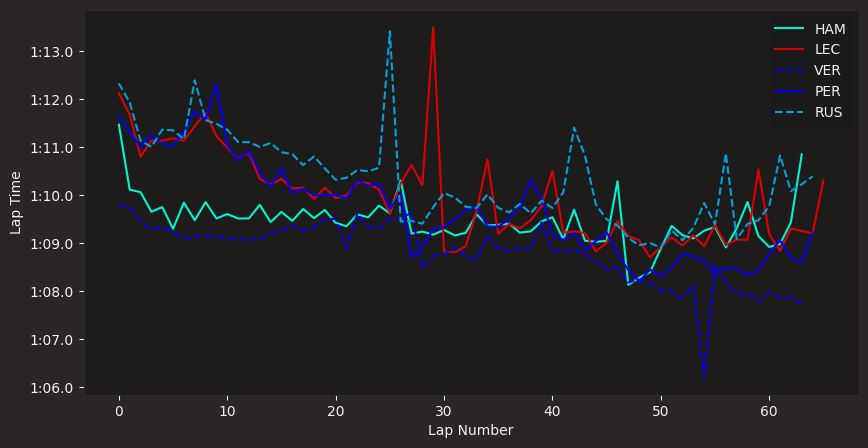

In [26]:
figg, ax = plt.subplots(figsize=(10, 5))

for driver in ('HAM', "LEC", "VER", "PER", "RUS"):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver, style=['color', 'linestyle'], session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend()